### Importing data

In [237]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [238]:
# Importing the dataset
df = pd.read_excel('КР-2.xlsx', sheet_name='Вар (3)')

In [239]:
df

,Успех,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,не успішний,9.00,1,2,Light,NaN,1230.0,1.56,5211.0,15610.0,1,1,0,0,1
1,не успішний,30.00,1,2,Light,8.0,2715.0,2.03,2424.0,12600.0,1,1,1,0,0
2,не успішний,15.00,1,2,light,NaN,878.0,1.81,3868.0,12600.0,1,1,0,1,1
3,не успішний,20.00,1,2,light,NaN,2346.0,2.18,4546.0,13930.0,1,1,0,0,1
4,не успішний,30.00,1,2,light,NaN,2542.0,1.63,3244.0,16030.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,6,Standart,4.0,13552.0,1.89,2306.0,8750.0,0,0,0,1,1
65,успішний,27.26,1,4,Light,3.0,7598.0,1.85,4065.0,13300.0,0,0,0,0,1
66,не успішний,148.91,1,2,Light,12.0,5431.0,1.99,906.0,11060.0,0,0,0,0,0
67,не успішний,50.93,1,3,Standart,17.0,4375.0,1.73,1742.0,11900.0,0,0,0,0,0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             69 non-null     object 
 1   Площадь загальна кв.м             69 non-null     float64
 2   Этаж                              69 non-null     int64  
 3   Количество сотрудников в штаті    69 non-null     int64  
 4   Тип                               69 non-null     object 
 5   Кількість відгуків в гуглі        39 non-null     float64
 6   Количество чеков в месяц          62 non-null     float64
 7   Среднее количество единиц в чеке  62 non-null     float64
 8   Людинопотік                       64 non-null     float64
 9   Середній дохід населення          64 non-null     float64
 10  Зупинка ГТ                        69 non-null     int64  
 11  Зупинка ГТ додому                 69 non-null     int64  
 12  Кінцева зу

In [241]:
# Drop useless
df = df.drop(['Этаж'], axis='columns', inplace=False)

### Missing data

In [242]:
df.dtypes

Успех                                object
Площадь загальна кв.м               float64
Количество сотрудников в штаті        int64
Тип                                  object
Кількість відгуків в гуглі          float64
Количество чеков в месяц            float64
Среднее количество единиц в чеке    float64
Людинопотік                         float64
Середній дохід населення            float64
Зупинка ГТ                            int64
Зупинка ГТ додому                     int64
Кінцева зупинкка ГТ                   int64
Пішохідний перехід                    int64
Спеціалізований хліб                  int64
dtype: object

In [243]:
#!pip install sklearn

In [244]:
from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(df[['Кількість відгуків в гуглі']]).round()
df[['Количество чеков в месяц']] = imputer_mean.fit_transform(df[['Количество чеков в месяц']]).round()
df[['Среднее количество единиц в чеке']] = imputer_mean.fit_transform(df[['Среднее количество единиц в чеке']]).round()
df[['Людинопотік']] = imputer_mean.fit_transform(df[['Людинопотік']]).round()
df[['Середній дохід населення']] = imputer_mean.fit_transform(df[['Середній дохід населення']]).round()

In [245]:
df.isnull().sum()

Успех                               0
Площадь загальна кв.м               0
Количество сотрудников в штаті      0
Тип                                 0
Кількість відгуків в гуглі          0
Количество чеков в месяц            0
Среднее количество единиц в чеке    0
Людинопотік                         0
Середній дохід населення            0
Зупинка ГТ                          0
Зупинка ГТ додому                   0
Кінцева зупинкка ГТ                 0
Пішохідний перехід                  0
Спеціалізований хліб                0
dtype: int64

### Outliers

In [246]:
df.describe()

,Площадь загальна кв.м,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,3.652174,42.898551,7097.188406,1.971014,2755.782609,11990.391304,0.362319,0.275362,0.086957,0.333333,0.318841
std,37.862989,1.607209,61.280489,4049.160557,0.240772,1981.850301,2474.008472,0.484192,0.449969,0.283836,0.474858,0.469441
min,4.000000,2.000000,1.000000,878.000000,1.000000,233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,2.000000,12.000000,3734.000000,2.000000,1296.000000,11060.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,4.000000,43.000000,6810.000000,2.000000,2269.000000,12180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,4.000000,43.000000,8548.000000,2.000000,3880.000000,13300.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,232.300000,8.000000,367.000000,17537.000000,3.000000,10016.000000,16100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [248]:
# Outliers
df = outliers(df)
df

,Успех,Площадь загальна кв.м,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,не успішний,9.00,2,Light,43.0,1230.0,2.0,5211.0,15610.0,1,1,0.000000,0,1
1,не успішний,30.00,2,Light,8.0,2715.0,2.0,2424.0,12600.0,1,1,0.938463,0,0
2,не успішний,15.00,2,light,43.0,878.0,2.0,3868.0,12600.0,1,1,0.000000,1,1
3,не успішний,20.00,2,light,43.0,2346.0,2.0,4546.0,13930.0,1,1,0.000000,0,1
4,не успішний,30.00,2,light,43.0,2542.0,2.0,3244.0,16030.0,0,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,6,Standart,4.0,13552.0,2.0,2306.0,8750.0,0,0,0.000000,1,1
65,успішний,27.26,4,Light,3.0,7598.0,2.0,4065.0,13300.0,0,0,0.000000,0,1
66,не успішний,148.91,2,Light,12.0,5431.0,2.0,906.0,11060.0,0,0,0.000000,0,0
67,не успішний,50.93,3,Standart,17.0,4375.0,2.0,1742.0,11900.0,0,0,0.000000,0,0


### Encoding

In [249]:
# Cheking categorical data
dfs = df[['Успех', 'Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Успех,2,"[не успішний, успішний]",object
1,Тип,5,"[Light, light, Standart, Micro, Premium]",object


In [250]:
# Encoding
type = {'Micro':0,'Light':1,'light':1,'Standart':2,'Premium':3}
df['Тип'] = df['Тип'].map(type)
success = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(success)
df

,Успех,Площадь загальна кв.м,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,0,9.00,2,1,43.0,1230.0,2.0,5211.0,15610.0,1,1,0.000000,0,1
1,0,30.00,2,1,8.0,2715.0,2.0,2424.0,12600.0,1,1,0.938463,0,0
2,0,15.00,2,1,43.0,878.0,2.0,3868.0,12600.0,1,1,0.000000,1,1
3,0,20.00,2,1,43.0,2346.0,2.0,4546.0,13930.0,1,1,0.000000,0,1
4,0,30.00,2,1,43.0,2542.0,2.0,3244.0,16030.0,0,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,6,2,4.0,13552.0,2.0,2306.0,8750.0,0,0,0.000000,1,1
65,1,27.26,4,1,3.0,7598.0,2.0,4065.0,13300.0,0,0,0.000000,0,1
66,0,148.91,2,1,12.0,5431.0,2.0,906.0,11060.0,0,0,0.000000,0,0
67,0,50.93,3,2,17.0,4375.0,2.0,1742.0,11900.0,0,0,0.000000,0,0


### Correlation

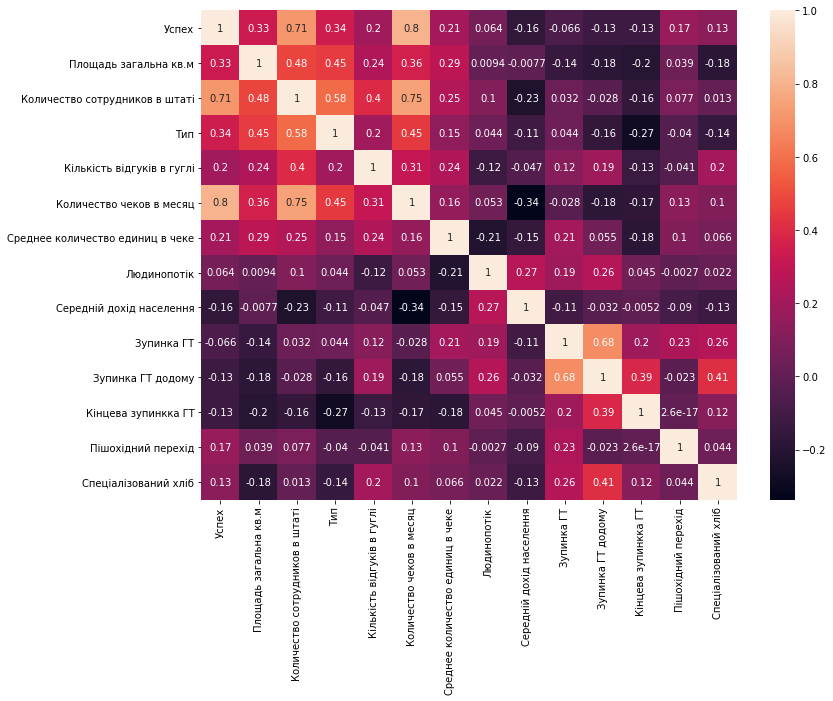

In [251]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Splitting

In [252]:
# Splitting the dataset into the Training set and Test set

#f = ['Площадь загальна кв.м','Количество сотрудников в штаті','Тип','Кількість відгуків в гуглі','Количество чеков в месяц','Среднее количество единиц в чеке','Людинопотік','Середній дохід населення','Зупинка ГТ','Зупинка ГТ додому','Кінцева зупинкка ГТ','Пішохідний перехід','Спеціалізований хліб']
# X = df[f]
# y = df['Успех']

f = ['Количество сотрудников в штаті','Тип','Среднее количество единиц в чеке','Людинопотік','Середній дохід населення','Зупинка ГТ','Зупинка ГТ додому','Кінцева зупинкка ГТ','Пішохідний перехід','Спеціалізований хліб']
X = df[f]
y = df['Успех']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [253]:
df.to_csv('prep.csv', sep=',', index=False)

In [254]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

### Feature Selection


In [255]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.126756
         Iterations 11
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.809     
Dependent Variable: Успех            AIC:              33.9432   
Date:               2021-12-27 23:38 BIC:              54.0165   
No. Observations:   55               Log-Likelihood:   -6.9716   
Df Model:           9                LL-Null:          -36.572   
Df Residuals:       45               LLR p-value:      1.9106e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     11.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        11.2753     6.0958    1.8497   0.0644   -0.6722   23.2228
x2        -1.8832     1.3709   -1.3737   0.1695   -4.5700

In [256]:
# Для выборки влиятелен только один фактор - 'Количество сотрудников в штаті'
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

1
[ True False False False False False False False False False]
[ 1  9  3  5 10  7  2  8  6  4]


In [257]:
# Leaving only Selected Features
X_train_select=X_train[:,[True, False, False, False, False, False, False, False, False, False]]
X_test_select=X_test[:,[True, False, False, False, False, False, False, False, False, False]]

In [258]:
X_train_select

array([[-0.99844277],
       [ 1.36346486],
       [-0.99844277],
       [ 2.54441867],
       [ 0.18251104],
       [-0.40796586],
       [ 1.36346486],
       [-0.99844277],
       [ 0.18251104],
       [ 0.18251104],
       [-0.40796586],
       [ 0.18251104],
       [ 0.18251104],
       [ 1.36346486],
       [ 1.36346486],
       [-0.99844277],
       [ 0.18251104],
       [ 0.18251104],
       [ 0.18251104],
       [ 1.36346486],
       [-0.99844277],
       [-0.99844277],
       [ 0.18251104],
       [-0.99844277],
       [-0.99844277],
       [ 0.18251104],
       [ 0.18251104],
       [ 0.18251104],
       [ 0.18251104],
       [ 0.18251104],
       [-0.99844277],
       [ 0.18251104],
       [ 0.18251104],
       [ 0.18251104],
       [ 1.36346486],
       [-0.99844277],
       [-0.99844277],
       [ 1.36346486],
       [ 1.36346486],
       [-0.99844277],
       [ 0.77298795],
       [-0.99844277],
       [-0.99844277],
       [ 2.54441867],
       [-0.99844277],
       [ 0

In [259]:
# Fitting Logistic Regression to the Training set 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

### Classification Tree

In [260]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

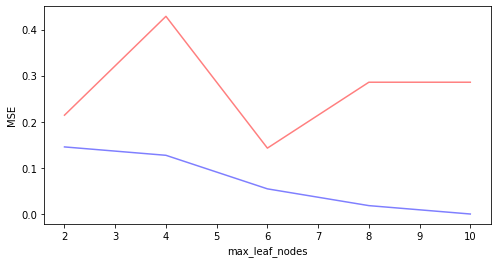

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [262]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 6, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [263]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test).round(3)

0.857

In [264]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 1]
 [1 3]]


### Visualisation

In [265]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество сотрудников в штаті')
plt.ylabel('Успех')
plt.legend()
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 10 features as input.

### Forest

In [266]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

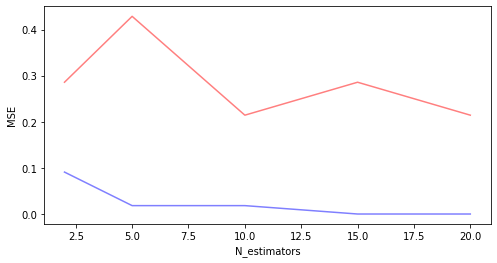

In [267]:
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [268]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=10, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

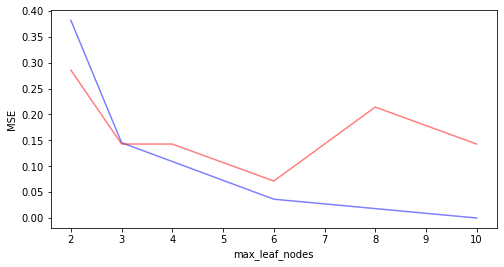

In [269]:
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 3, 4, 6, 8, 10])

In [270]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_leaf_nodes = 3, random_state = 10).fit(X_train, y_train)

In [271]:
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

0.857

In [272]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[10  0]
 [ 2  2]]


In [273]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество сотрудников в штаті')
plt.ylabel('Успех')
plt.legend()
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 10 features as input.

In [298]:
ct.score(X_test,y_test).round(3) # tree

0.857

In [299]:
rf.score(X_test,y_test).round(3) # Forest

0.857

In [297]:
print(cm) # tree
print()
print(cm2) # Forest

[[9 1]
 [1 3]]

[[10  0]
 [ 2  2]]


Точность моделей одинаковая

True positive - дерево класифицирует больше позитивных результатов

True negative - лес класифицирует больше негативных результатов

Fasle positive - лес класифицирует больше ошибок 1-го типа

Fasle negative - дерево класифицирует больше ошибок 2-го типа


### Hierarchical clustering

In [275]:
df = pd.read_csv('prep.csv', sep=',')
df

,Успех,Площадь загальна кв.м,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,0,9.00,2,1,43.0,1230.0,2.0,5211.0,15610.0,1,1,0.000000,0,1
1,0,30.00,2,1,8.0,2715.0,2.0,2424.0,12600.0,1,1,0.938463,0,0
2,0,15.00,2,1,43.0,878.0,2.0,3868.0,12600.0,1,1,0.000000,1,1
3,0,20.00,2,1,43.0,2346.0,2.0,4546.0,13930.0,1,1,0.000000,0,1
4,0,30.00,2,1,43.0,2542.0,2.0,3244.0,16030.0,0,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,6,2,4.0,13552.0,2.0,2306.0,8750.0,0,0,0.000000,1,1
65,1,27.26,4,1,3.0,7598.0,2.0,4065.0,13300.0,0,0,0.000000,0,1
66,0,148.91,2,1,12.0,5431.0,2.0,906.0,11060.0,0,0,0.000000,0,0
67,0,50.93,3,2,17.0,4375.0,2.0,1742.0,11900.0,0,0,0.000000,0,0


In [276]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Успех','Площадь загальна кв.м','Количество сотрудников в штаті','Тип','Кількість відгуків в гуглі','Количество чеков в месяц','Среднее количество единиц в чеке','Людинопотік','Середній дохід населення','Зупинка ГТ','Зупинка ГТ додому','Кінцева зупинкка ГТ','Пішохідний перехід','Спеціалізований хліб']).round()

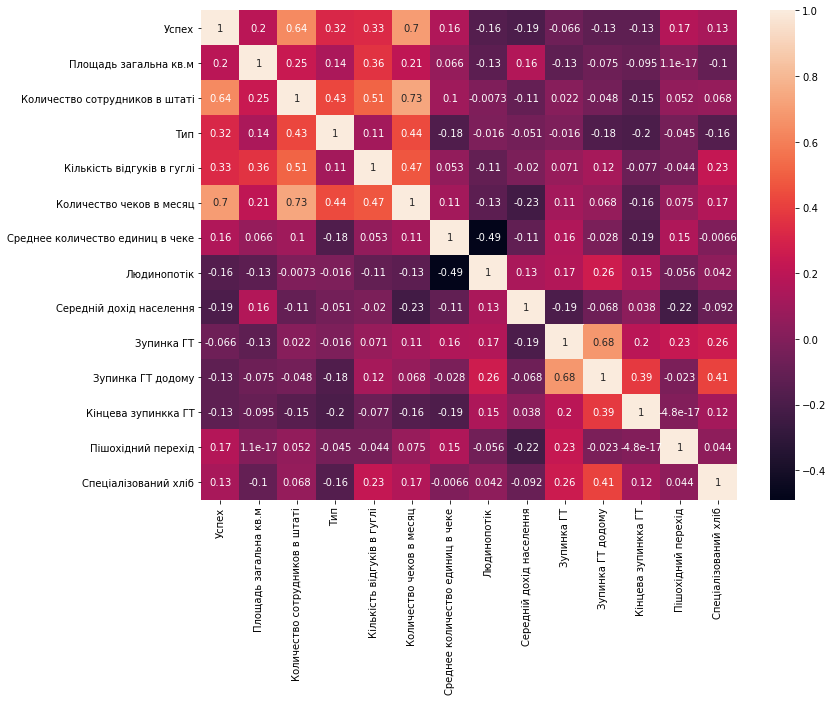

In [277]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

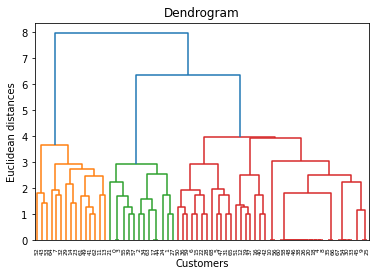

In [278]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Baseline model


In [279]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [280]:
hc

array([2, 2, 2, 2, 0, 3, 3, 1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 2, 0, 0, 0, 2,
       3, 1, 2, 0, 0, 2, 3, 1, 0, 3, 1, 0, 2, 0, 3, 0, 0, 2, 0, 1, 0, 1,
       2, 0, 0, 3, 0, 1, 3, 0, 1, 1, 0, 2, 0, 2, 0, 3, 0, 1, 1, 2, 1, 3,
       0, 0, 3], dtype=int64)

### Feature Reduction

In [281]:
# Less features
X = df.iloc[:, [0, 2, 5]]

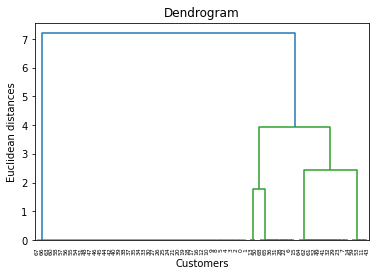

In [282]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [283]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [284]:
hc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

### K-Means Clustering 

In [285]:
df = pd.read_csv('prep.csv', sep=',')
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Успех','Площадь загальна кв.м','Количество сотрудников в штаті','Тип','Кількість відгуків в гуглі','Количество чеков в месяц','Среднее количество единиц в чеке','Людинопотік','Середній дохід населення','Зупинка ГТ','Зупинка ГТ додому','Кінцева зупинкка ГТ','Пішохідний перехід','Спеціалізований хліб']).round()


,Успех,Площадь загальна кв.м,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
65,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
66,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Number of clusters

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


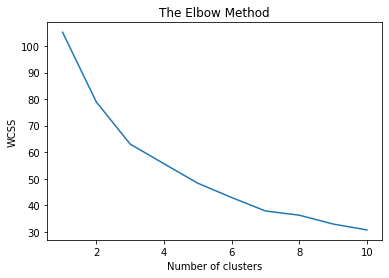

In [286]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

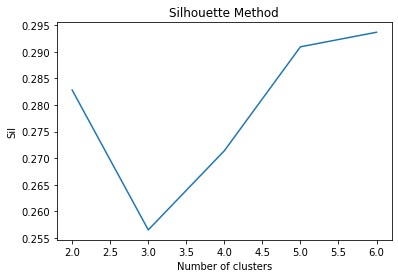

2:0.28280115303621856
3:0.256518514658998
4:0.27139618330795545
5:0.2909272445888263
6:0.2936639084899567


In [287]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 7):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 7), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

### Model

In [288]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Площадь загальна кв.м','Количество сотрудников в штаті','Тип','Кількість відгуків в гуглі','Количество чеков в месяц','Среднее количество единиц в чеке','Людинопотік','Середній дохід населення','Зупинка ГТ','Зупинка ГТ додому','Кінцева зупинкка ГТ','Пішохідний перехід','Спеціалізований хліб']).round(2)

,Успех,Площадь загальна кв.м,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,0.29,0.22,0.25,0.39,0.23,0.32,0.56,0.39,0.64,0.88,0.94,0.24,0.18,0.76
1,1.00,0.35,0.51,0.48,0.16,0.60,0.57,0.29,0.63,0.15,-0.00,0.05,0.45,0.30
2,0.00,0.27,0.15,0.43,0.14,0.26,0.51,0.28,0.68,0.00,0.00,0.00,0.00,0.05
3,0.00,0.22,0.12,0.39,0.17,0.26,0.57,0.20,0.64,0.64,0.27,0.09,1.00,0.18


### Feature Reduction

In [289]:
# Less features
X = df[:, [0, 2, 5]]

In [290]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество сотрудников в штаті','Количество чеков в месяц']).round()

,Успех,Количество сотрудников в штаті,Количество чеков в месяц
0,-0.0,0.0,0.0
1,1.0,1.0,1.0


In [291]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.487

Результаты иерархической кластеризации пересекаются на 48.7 % с результатами кластеризации на основе К-средних